In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import linear_model 
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn import preprocessing
from sklearn import model_selection
from sklearn import naive_bayes
from sklearn import tree
from sklearn import ensemble
from sklearn import feature_selection
from xgboost import XGBClassifier

In [2]:
df=pd.read_csv("/home/delta/dataset/project/credit_default.csv")
colname={"ID":"id","SEX":"sex","EDUCATION":"edu","MARRIAGE":"mar","LIMIT_BAL":"lbal","PAY_0":"p1","PAY_2":"p2","PAY_3":"p3","PAY_4":"p4","PAY_5":"p5","PAY_6":"p6",
         "BILL_AMT1":"ba1","BILL_AMT2":"ba2","BILL_AMT3":"ba3","BILL_AMT4":"ba4","BILL_AMT5":"ba5","BILL_AMT6":"ba6",
         "PAY_AMT1":"pa1","PAY_AMT2":"pa2","PAY_AMT3":"pa3","PAY_AMT4":"pa4","PAY_AMT5":"pa5","PAY_AMT6":"pa6"
        ,"default.payment.next.month":"dpay"}
df.rename(columns=colname,inplace=True)
df.mar.replace({0:3},inplace=True)


change = (df.edu == 5) | (df.edu == 6) | (df.edu == 0)
df.loc[change, 'edu'] = 4
#df.edu.value_counts()


change = (df.p1 == -1) | (df.p1 == -2) | (df.p1 == 0)
df.loc[change, 'p1'] = 0
#df.p2.value_counts()

change = (df.p2 == -1) | (df.p2 == -2) | (df.p2 == 0)
df.loc[change, 'p2'] = 0
#df.p2.value_counts()

change = (df.p3 == -1) | (df.p3 == -2) | (df.p3 == 0)
df.loc[change, 'p3'] = 0
#df.p3.value_counts()

change = (df.p4 == -1) | (df.p4 == -2) | (df.p4 == 0)
df.loc[change, 'p4'] = 0
#df.p4.value_counts()

change = (df.p5 == -1) | (df.p5 == -2) | (df.p5 == 0)
df.loc[change, 'p5'] = 0
#df.p5.value_counts()

change = (df.p6 == -1) | (df.p6 == -2) | (df.p6 == 0)
df.loc[change, 'p6'] = 0
#df.p6.value_counts()

In [4]:
df.info()

df.drop("id",axis=1,inplace=True)
df.sample(20)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
lbal    30000 non-null float64
sex     30000 non-null int64
edu     30000 non-null int64
mar     30000 non-null int64
AGE     30000 non-null int64
p1      30000 non-null int64
p2      30000 non-null int64
p3      30000 non-null int64
p4      30000 non-null int64
p5      30000 non-null int64
p6      30000 non-null int64
ba1     30000 non-null float64
ba2     30000 non-null float64
ba3     30000 non-null float64
ba4     30000 non-null float64
ba5     30000 non-null float64
ba6     30000 non-null float64
pa1     30000 non-null float64
pa2     30000 non-null float64
pa3     30000 non-null float64
pa4     30000 non-null float64
pa5     30000 non-null float64
pa6     30000 non-null float64
dpay    30000 non-null int64
dtypes: float64(13), int64(11)
memory usage: 5.5 MB


ValueError: labels ['id'] not contained in axis

In [5]:
df['agecat'] = 0 #creates a column of 0
df.loc[((df['AGE'] > 20) & (df['AGE'] < 30)) , 'agecat'] = 1
df.loc[((df['AGE'] >= 30) & (df['AGE'] < 40)) , 'agecat'] = 2
df.loc[((df['AGE'] >= 40) & (df['AGE'] < 50)) , 'agecat'] = 3
df.loc[((df['AGE'] >= 50) & (df['AGE'] < 60)) , 'agecat'] = 4
df.loc[((df['AGE'] >= 60) & (df['AGE'] < 70)) , 'agecat'] = 5
df.loc[((df['AGE'] >= 70) & (df['AGE'] < 81)) , 'agecat'] = 6

In [6]:
cdf=df[["lbal","pa1","ba1","pa2","ba2","pa3","ba3","pa4","ba4","pa5","ba5","pa6","ba6","dpay"]]
ddf=df[["sex","edu","mar","AGE","p1","p2","p3","p4","p5","p6","dpay"]]

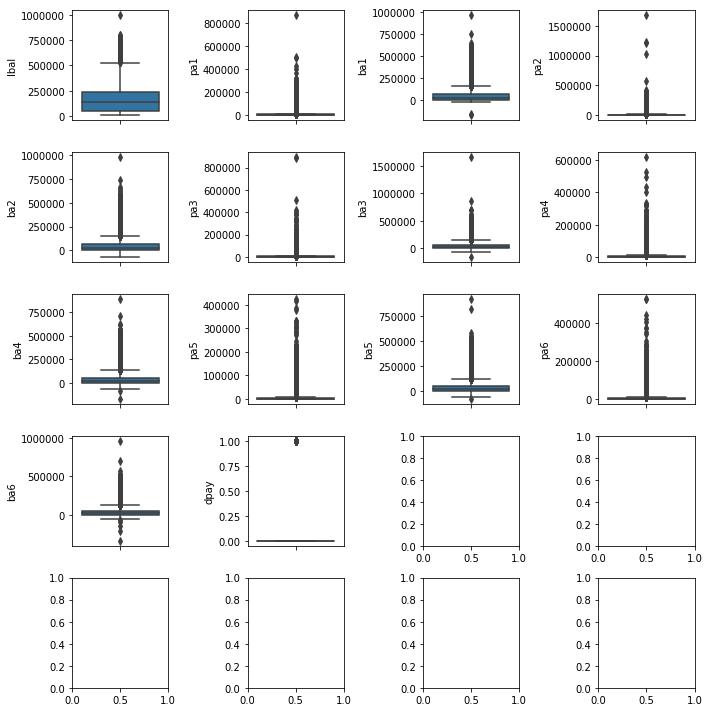

In [6]:
fig,axes=plt.subplots(nrows=5,ncols=4,figsize=(10,10))
axes1=axes.flatten()
index=0
for col in cdf.columns.values:
    sns.boxplot(y=col,data=cdf,ax=axes1[index])
    index+=1
plt.tight_layout()
plt.show()

In [7]:
cdf.describe()

,lbal,pa1,ba1,pa2,ba2,pa3,ba3,pa4,ba4,pa5,ba5,pa6,ba6,dpay
count,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.00000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,5663.580500,51223.330900,5.921163e+03,49179.075167,5225.68150,4.701315e+04,4826.076867,43262.948967,4799.387633,40311.400967,5215.502567,38871.760400,0.221200
std,129747.661567,16563.280354,73635.860576,2.304087e+04,71173.768783,17606.96147,6.934939e+04,15666.159744,64332.856134,15278.305679,60797.155770,17777.465775,59554.107537,0.415062
min,10000.000000,0.000000,-165580.000000,0.000000e+00,-69777.000000,0.00000,-1.572640e+05,0.000000,-170000.000000,0.000000,-81334.000000,0.000000,-339603.000000,0.000000
25%,50000.000000,1000.000000,3558.750000,8.330000e+02,2984.750000,390.00000,2.666250e+03,296.000000,2326.750000,252.500000,1763.000000,117.750000,1256.000000,0.000000
50%,140000.000000,2100.000000,22381.500000,2.009000e+03,21200.000000,1800.00000,2.008850e+04,1500.000000,19052.000000,1500.000000,18104.500000,1500.000000,17071.000000,0.000000
75%,240000.000000,5006.000000,67091.000000,5.000000e+03,64006.250000,4505.00000,6.016475e+04,4013.250000,54506.000000,4031.500000,50190.500000,4000.000000,49198.250000,0.000000
max,1000000.000000,873552.000000,964511.000000,1.684259e+06,983931.000000,896040.00000,1.664089e+06,621000.000000,891586.000000,426529.000000,927171.000000,528666.000000,961664.000000,1.000000


In [8]:
X=cdf.drop("dpay",axis=1)
y=cdf["dpay"]

In [9]:
depth=list(range(3,11))
grid = {'max_depth': np.arange(3, 10),
             'criterion' : ['gini','entropy'],
             'max_leaf_nodes': [5,10,20,100],
             'min_samples_split': [2, 5, 10, 20]}

model=tree.DecisionTreeClassifier()
gmodel=model_selection.GridSearchCV(model,grid,scoring="recall")
gmodel.fit(X,y)
best = gmodel.best_estimator_
print(best)



DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=9,
            max_features=None, max_leaf_nodes=100,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=5,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')


In [10]:
trmodel=tree.DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=9,
            max_features=None, max_leaf_nodes=100,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=5,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
trmodel.fit(X,y)
print(dict(zip(X.columns, trmodel.feature_importances_)))

{'lbal': 0.18552067306679698, 'pa1': 0.17600155472269466, 'ba1': 0.059948404384135352, 'pa2': 0.12531539727571492, 'ba2': 0.11449509434347845, 'pa3': 0.079326458082001519, 'ba3': 0.084900633738151307, 'pa4': 0.041445411693704436, 'ba4': 0.026205257571104833, 'pa5': 0.020557293104136509, 'ba5': 0.027496640882571189, 'pa6': 0.01910015421784891, 'ba6': 0.039687026917660927}


In [12]:
#cdf["c1"]=(cdf.loc[:]-cdf.loc[:])
#cdf["c2"]=cdf["ba3"]-cdf["pa2"]

In [13]:
cdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 14 columns):
lbal    30000 non-null float64
pa1     30000 non-null float64
ba1     30000 non-null float64
pa2     30000 non-null float64
ba2     30000 non-null float64
pa3     30000 non-null float64
ba3     30000 non-null float64
pa4     30000 non-null float64
ba4     30000 non-null float64
pa5     30000 non-null float64
ba5     30000 non-null float64
pa6     30000 non-null float64
ba6     30000 non-null float64
dpay    30000 non-null int64
dtypes: float64(13), int64(1)
memory usage: 3.2 MB


In [10]:
#ddf.info()
#ddf.AGE.describe()
ddf['agecat'] = 0 #creates a column of 0
ddf.loc[((ddf['AGE'] >= 20) & (ddf['AGE'] < 30)) , 'agecat'] = 1
ddf.loc[((ddf['AGE'] >= 30) & (ddf['AGE'] < 40)) , 'agecat'] = 2
ddf.loc[((ddf['AGE'] >= 40) & (ddf['AGE'] < 50)) , 'agecat'] = 3
ddf.loc[((ddf['AGE'] >= 50) & (ddf['AGE'] < 60)) , 'agecat'] = 4
ddf.loc[((ddf['AGE'] >= 60) & (ddf['AGE'] < 70)) , 'agecat'] = 5
ddf.loc[((ddf['AGE'] >= 70) & (ddf['AGE'] < 81)) , 'agecat'] = 6

/home/delta/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/delta/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
/home/delta/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pand

In [11]:
ddf.info()
#for col in ["sex","edu","mar","a]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 12 columns):
sex       30000 non-null int64
edu       30000 non-null int64
mar       30000 non-null int64
AGE       30000 non-null int64
p1        30000 non-null int64
p2        30000 non-null int64
p3        30000 non-null int64
p4        30000 non-null int64
p5        30000 non-null int64
p6        30000 non-null int64
dpay      30000 non-null int64
agecat    30000 non-null int64
dtypes: int64(12)
memory usage: 2.7 MB


In [12]:
ddf1=ddf.copy()
for col in ["sex","edu","mar","agecat","p1","p2","p3","p4","p5","p6"]:
    for val in ddf[col].unique():
        ddf1[col][(ddf1[col]==val) & (ddf.dpay==0)] = (ddf[(ddf[col]==val) & (ddf.dpay==0)].shape[0])/ddf[ddf[col]==val].shape[0]
        ddf1[col][(ddf1[col]==val) & (ddf.dpay==1)] = (ddf[(ddf[col]==val) & (ddf.dpay==1)].shape[0])/ddf[ddf[col]==val].shape[0]

/home/delta/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/home/delta/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [35]:
X=ddf1[["sex","edu","mar","agecat","p1","p2","p3","p4","p5","p6"]]
y=ddf1["dpay"]
#####grid search

depth=list(range(3,11))
grid = {'max_depth': np.arange(3, 20),
             'criterion' : ['gini','entropy'],
             'max_leaf_nodes': [5,10,20,100],
             'min_samples_split': [2, 5, 10, 20,30,50]}

model=tree.DecisionTreeClassifier()
gmodel=model_selection.GridSearchCV(model,grid,scoring="recall")
gmodel.fit(X,y)
best = gmodel.best_estimator_
print(best)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=5, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')


In [36]:
trmodel=tree.DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=5, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')
trmodel.fit(X,y)
print(dict(zip(X.columns, best.feature_importances_)))

{'sex': 0.0, 'edu': 0.0, 'mar': 0.0, 'agecat': 1.0, 'p1': 0.0, 'p2': 0.0, 'p3': 0.0, 'p4': 0.0, 'p5': 0.0, 'p6': 0.0}
